<a href="https://colab.research.google.com/github/Ponter255/cuddly-chainsaw/blob/master/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality Reduciton**

*  In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. Approaches can be divided into:

> **1. Feature Extraction/Projection** and **2. Feature Selection**





---



### **1.1 PCA: Principal Component Analysis**

*  Is a statistical method that creates new features or characteristics of data by analyzing the characteristics of the dataset. Essentially, the characteristics of the data are summarized or combined together. You can also conceive of Principal Component Analysis as "squishing" data down into just a few dimensions from much higher dimensions space.

* To be more concrete, a drink might be described by many features, but many of these features will be redundant and relatively useless for identifying the drink in question. Rather than describing wine with features like aeration, C02 levels, etc., they could more easily be described by color, taste, and age.

* Principal Component Analysis selects the most influential characteristics of the dataset and creates features based on them, thus making a dimensionality reduction.

* PCA preserves the correlations between variables when it creates new features. The principal components created by the technique are linear combinations of the original variables, calculated with concepts called eigenvectors.

* It is assumed that the new components are orthogonal, or unrelated to one another.



> For PCA we are going to use a mushroom dataset!




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


* Once we load in the data, we'll check for any **null** values. We'll also **encode** the data with the **LabelEncoder** (encodes the labels with a value between 0 and n_classes-1 where n is the number of distinct labels). The class feature is the first column in the dataset, so we split up the features and labels accordingly:

In [4]:
encoder = LabelEncoder()
# Now apply the transformation to all the columns:
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


*   Separate the data between the output of the dataset and the input features

In [0]:
# Target of the dataset
indexClass = 0
#Starting feature of the dataset
indexCap_shape = 1
#Last feature of the dataset
indexOdor = 5 
#Last feature of the dataset
indexHabitat = 23

# Selecting all rows and columns from 1 to 23
features = data.iloc[:,indexCap_shape : indexHabitat]
#Selecting all rows from the class (target) column
target = data.iloc[:, indexClass]

* Now we need to standardize all the features by removing the mean and scaling to unit variance, for this we will use a Stantard Scaler!

* The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1 (s).

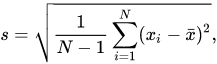

In [6]:
scaler = StandardScaler()
features_standard = scaler.fit_transform(features)
features_standard2 = pd.DataFrame(data=features_standard)
features_standard2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,-1.045952,0.683778,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


* We'll now use PCA to get the list of features and plot which features have the most explanatory power, or have the most variance. These are the principle components. It looks like around 17 or 18 of the features explain the majority, almost 95% of our data:

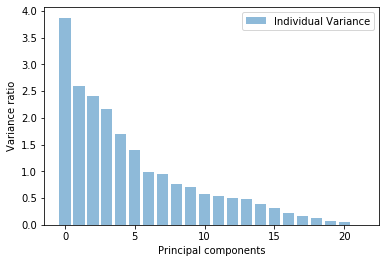

In [7]:
pca = PCA()
pca.fit_transform(features_standard)
pca_variance = pca.explained_variance_

plt.figure()
plt.bar(range(22), pca_variance, alpha=0.5, align='center', label='Individual Variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

* The individual variance is a key item, since it explains the individual distribuition of each component. 

* The more a feature is concentrated in this distribution the less is its importance for the model, beacuse its values are asgnied in a way that doesn't help in classificating.

* In a Gaussian Curve the higher the distribution along the X-Axis the clear it gets the classificaiton

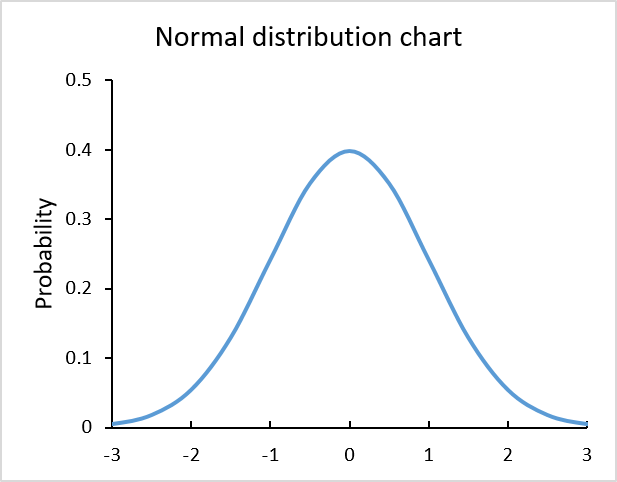

In [8]:
pca_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 7.90604723e-34])

* Let's convert the features into the 17 top features. We'll then plot a scatter plot of the data point classification based on these 17 features.

* Since we are reducing the number of features (dimensions) of the dataset, the features that were shrunk by the PCA are remodelled with the rest to aggregate more explanatory power 

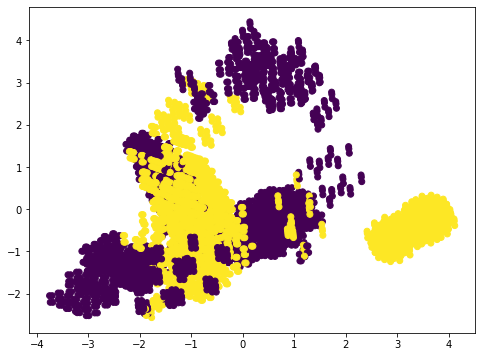

In [21]:
pca2 = PCA(n_components=17)
pca2.fit(features_standard)
x_3d = pca2.transform(features_standard)

plt.figure(figsize=(8,6))
# Since the new features aren't an specific real measurement, there is no point in indexing them.
plt.scatter(x_3d[:,0], x_3d[:,5], c=data['class'])
plt.show()

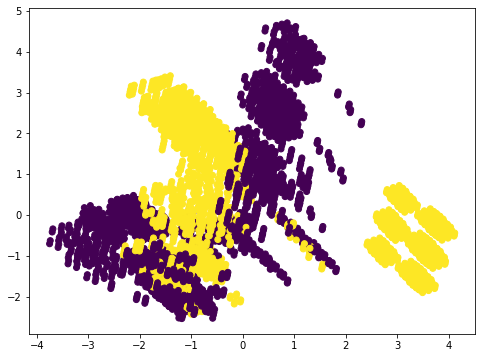

In [19]:
pca3 = PCA(n_components=2)
pca3.fit(features_standard)
x_3d = pca3.transform(features_standard)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=data['class'])
plt.show()